`Prérequis`

**Duplicates**

**Missing data**

**Outliers**

In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data/train.csv")

In [3]:
m2 = 0.092903
euro = 0.95 

In [4]:
data["size_m2"] = data["size"] * m2
data["price_euro"] = data["price"] * euro

In [5]:
data = data.astype({"size_m2": int, "price_euro": int})

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
 8   size_m2         2016 non-null   int64  
 9   price_euro      2016 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 157.6+ KB


In [7]:
data

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,size_m2,price_euro
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0,240,755250
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0,208,869250
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0,189,902500
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0,353,1852500
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0,96,902500
...,...,...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,sqft,0.50,acre,98112,910000.0,127,864500
2012,1,1.0,889.0,sqft,NaN,NaN,98121,550000.0,82,522500
2013,4,2.0,2140.0,sqft,6250.00,sqft,98199,1150000.0,198,1092500
2014,2,2.0,795.0,sqft,NaN,NaN,98103,590000.0,73,560500


In [8]:
y = data["price_euro"]
X = data[['size']]

In [9]:
from sklearn.model_selection import train_test_split


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
from sklearn.linear_model import Ridge

In [12]:
model_rg = Ridge(alpha=1.0)

In [13]:
model_rg.fit(X_train, y_train)

Ridge()

In [14]:
model_rg.score(X_test, y_test)

0.5717807742286313

# Grid Search

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
grid_parameters = {'alpha':[1.0, 2,3,10], 'solver':["svd", "cholesky"]}
gscv = GridSearchCV( Ridge(), grid_parameters, scoring="r2")

In [17]:
gscv.fit(X_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1.0, 2, 3, 10],
                         'solver': ['svd', 'cholesky']},
             scoring='r2')

In [18]:
display(gscv.best_score_)
display(gscv.best_params_)
display(gscv.best_estimator_)

0.3783750755526324

{'alpha': 10, 'solver': 'svd'}

Ridge(alpha=10, solver='svd')

In [19]:
Ridge(alpha=10, solver='svd')

Ridge(alpha=10, solver='svd')

# Randomize Search

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

In [21]:
grid_parameters = {'alpha':stats.uniform(0, 1000), 'solver':["svd", "cholesky"]}


In [22]:

search = RandomizedSearchCV( Ridge(), grid_parameters, 
                            scoring='r2',
                            n_iter=100,
                            cv=5, n_jobs=-1)
search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x14864b6d0>,
                                        'solver': ['svd', 'cholesky']},
                   scoring='r2')

In [23]:
display(search.best_score_)
display(search.best_params_)
display(search.best_estimator_)

0.3783750910063925

{'alpha': 983.9871796867452, 'solver': 'cholesky'}

Ridge(alpha=983.9871796867452, solver='cholesky')

In [24]:
from scipy import stats

dist_1 = stats.norm(10, 2) 


dist_2 = stats.randint(1,100) # Si aucune idée
dist_3 = stats.uniform(1, 100) # same

In [25]:
grid_parameters = {'alpha': dist_1, 'solver':["svd", "cholesky"]}


In [26]:

search = RandomizedSearchCV( Ridge(), grid_parameters, 
                            scoring='r2',
                            n_iter=100,
                            cv=5, n_jobs=-1)

In [27]:
search.fit(X_train,y_train)
display(search.best_score_)
display(search.best_params_)
display(search.best_estimator_)

0.3783750756362321

{'alpha': 15.268786035088379, 'solver': 'svd'}

Ridge(alpha=15.268786035088379, solver='svd')

In [28]:
model_rg_final = search.best_estimator_
model_rg_final.score(X_test,y_test)

0.5717807726355565

# Learning Curve 

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve


In [30]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model_rg_final,
    X=X,
    y=y,
    cv=5,
    scoring="r2",
    train_sizes = [5, 50, 100, 500, 600, 1500]
)

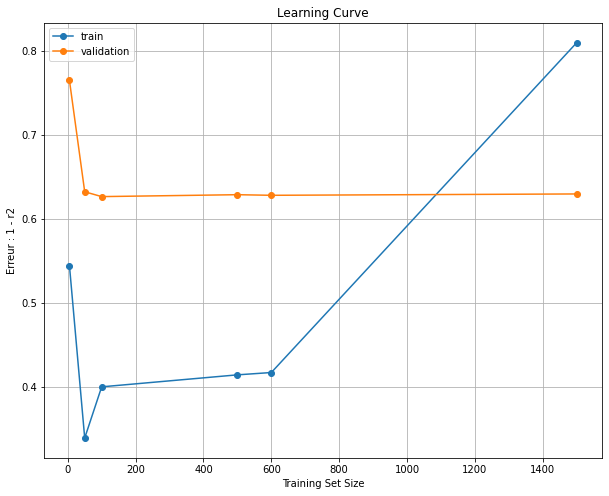

In [31]:
train_mean = 1-train_scores.mean(axis=1)
test_mean = 1-test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train", marker='o')
plt.plot(train_sizes, test_mean, label="validation", marker='o')

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Erreur : 1 - r2")
plt.legend(loc="best")
plt.grid(True)
plt.show()